### DATA PRE-PROCESSING & FEATURE SELECTION:

#### DATA PRE-PROCESSING SUMMARY:

- Ckeck Missing Value
- Convert categorical to numerical
- Check outliers & Impute outliers
- Feature transformation
- Feature scaling

#### FEATURE SELECTION SUMMARY:

- Drop unique & Constant Column
- Check correlation with heatmap & Remove highly correlated feature
- Check Duplicates
- Principle component analysis
- Save pre-process data


#### IMPORT NECESSARY LIBRARY


In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import pylab
import warnings 
# Used to ignore the warnings
warnings.filterwarnings('ignore')

#### LOAD DATA FOR EXPLOTARY DATA ANALYSIS


In [3]:
data = pd.read_excel(r"E:\IABAC_Project\Data\Processed_data.xlsx")

pd.set_option("display.max_columns", None)  # Used to display the all features

### CHECK MISSING VALUE:


In [4]:
data.isnull().sum()

Unnamed: 0                      0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

- Their is no missing value present in the data.


### CONVERT CATEGORICAL TO NUMERICAL


In [5]:
# Get all categorical feature list
list(data.select_dtypes("number"))

['Unnamed: 0',
 'Age',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'OverTime',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition',
 'PerformanceRating']

**Technique Used:**

**1.Mannual Encoding:** Mannual encoding is a best techinque to handel categorical feature with the help of map function, map the labels based on frequency.

**2.Frequency Encoding:** Frequency encoding is an encoding technique to transform an original categorical variable to a numerical variable by considering the frequency distribution of the data getting value counts.


#### 1.Gender:


In [5]:
# Get value counts of gender
data.Gender.value_counts()

Gender
1    725
0    475
Name: count, dtype: int64

#### 2.Education Background


In [6]:
# Get value counts of Education Background
data.EducationBackground.value_counts()

EducationBackground
1    492
3    384
2    137
5    100
4     66
0     21
Name: count, dtype: int64

#### 3.Marital Status


In [7]:
# Get the value counts of marital status
data.MaritalStatus.value_counts()

MaritalStatus
1    548
2    384
0    268
Name: count, dtype: int64

#### 4.Employee Department


In [8]:
# Get the value counts of employee department
data.EmpDepartment.value_counts()

EmpDepartment
5    373
1    361
4    343
3     54
2     49
0     20
Name: count, dtype: int64

#### 5.Employee Job Role


In [9]:
# Getting the value counts of EmpJobRole
data.EmpJobRole.value_counts()

EmpJobRole
13    270
3     236
9      94
12     77
14     69
7      64
15     52
8      51
4      49
6      45
18     38
10     33
5      33
1      20
11     19
0      16
16     15
2      12
17      7
Name: count, dtype: int64

#### 6.Business Travel Frequency:


In [6]:
# Get the value count of buisness travel frequency
data.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
2    846
1    222
0    132
Name: count, dtype: int64

#### 7.Overtime:


In [11]:
# Get the value count of Overtime
data.OverTime.value_counts()

OverTime
0    847
1    353
Name: count, dtype: int64

#### 8.Attrition


In [12]:
# Get the value counts of Attrition
data.Attrition.value_counts()

Attrition
0    1022
1     178
Name: count, dtype: int64

In [13]:
# Check all data features
data.head()

,Unnamed: 0,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4
3,3,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3
4,4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3


In [4]:
data.drop(columns=["Unnamed: 0"], inplace=True)  # remove the unnamed column

In [5]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3


### CHECK OUTLIERS AND IMPUTE OUTLIERS:

**BoxPlot:** Box plots are used to show distributions of numeric data values as well as it helps to detect the outliers.


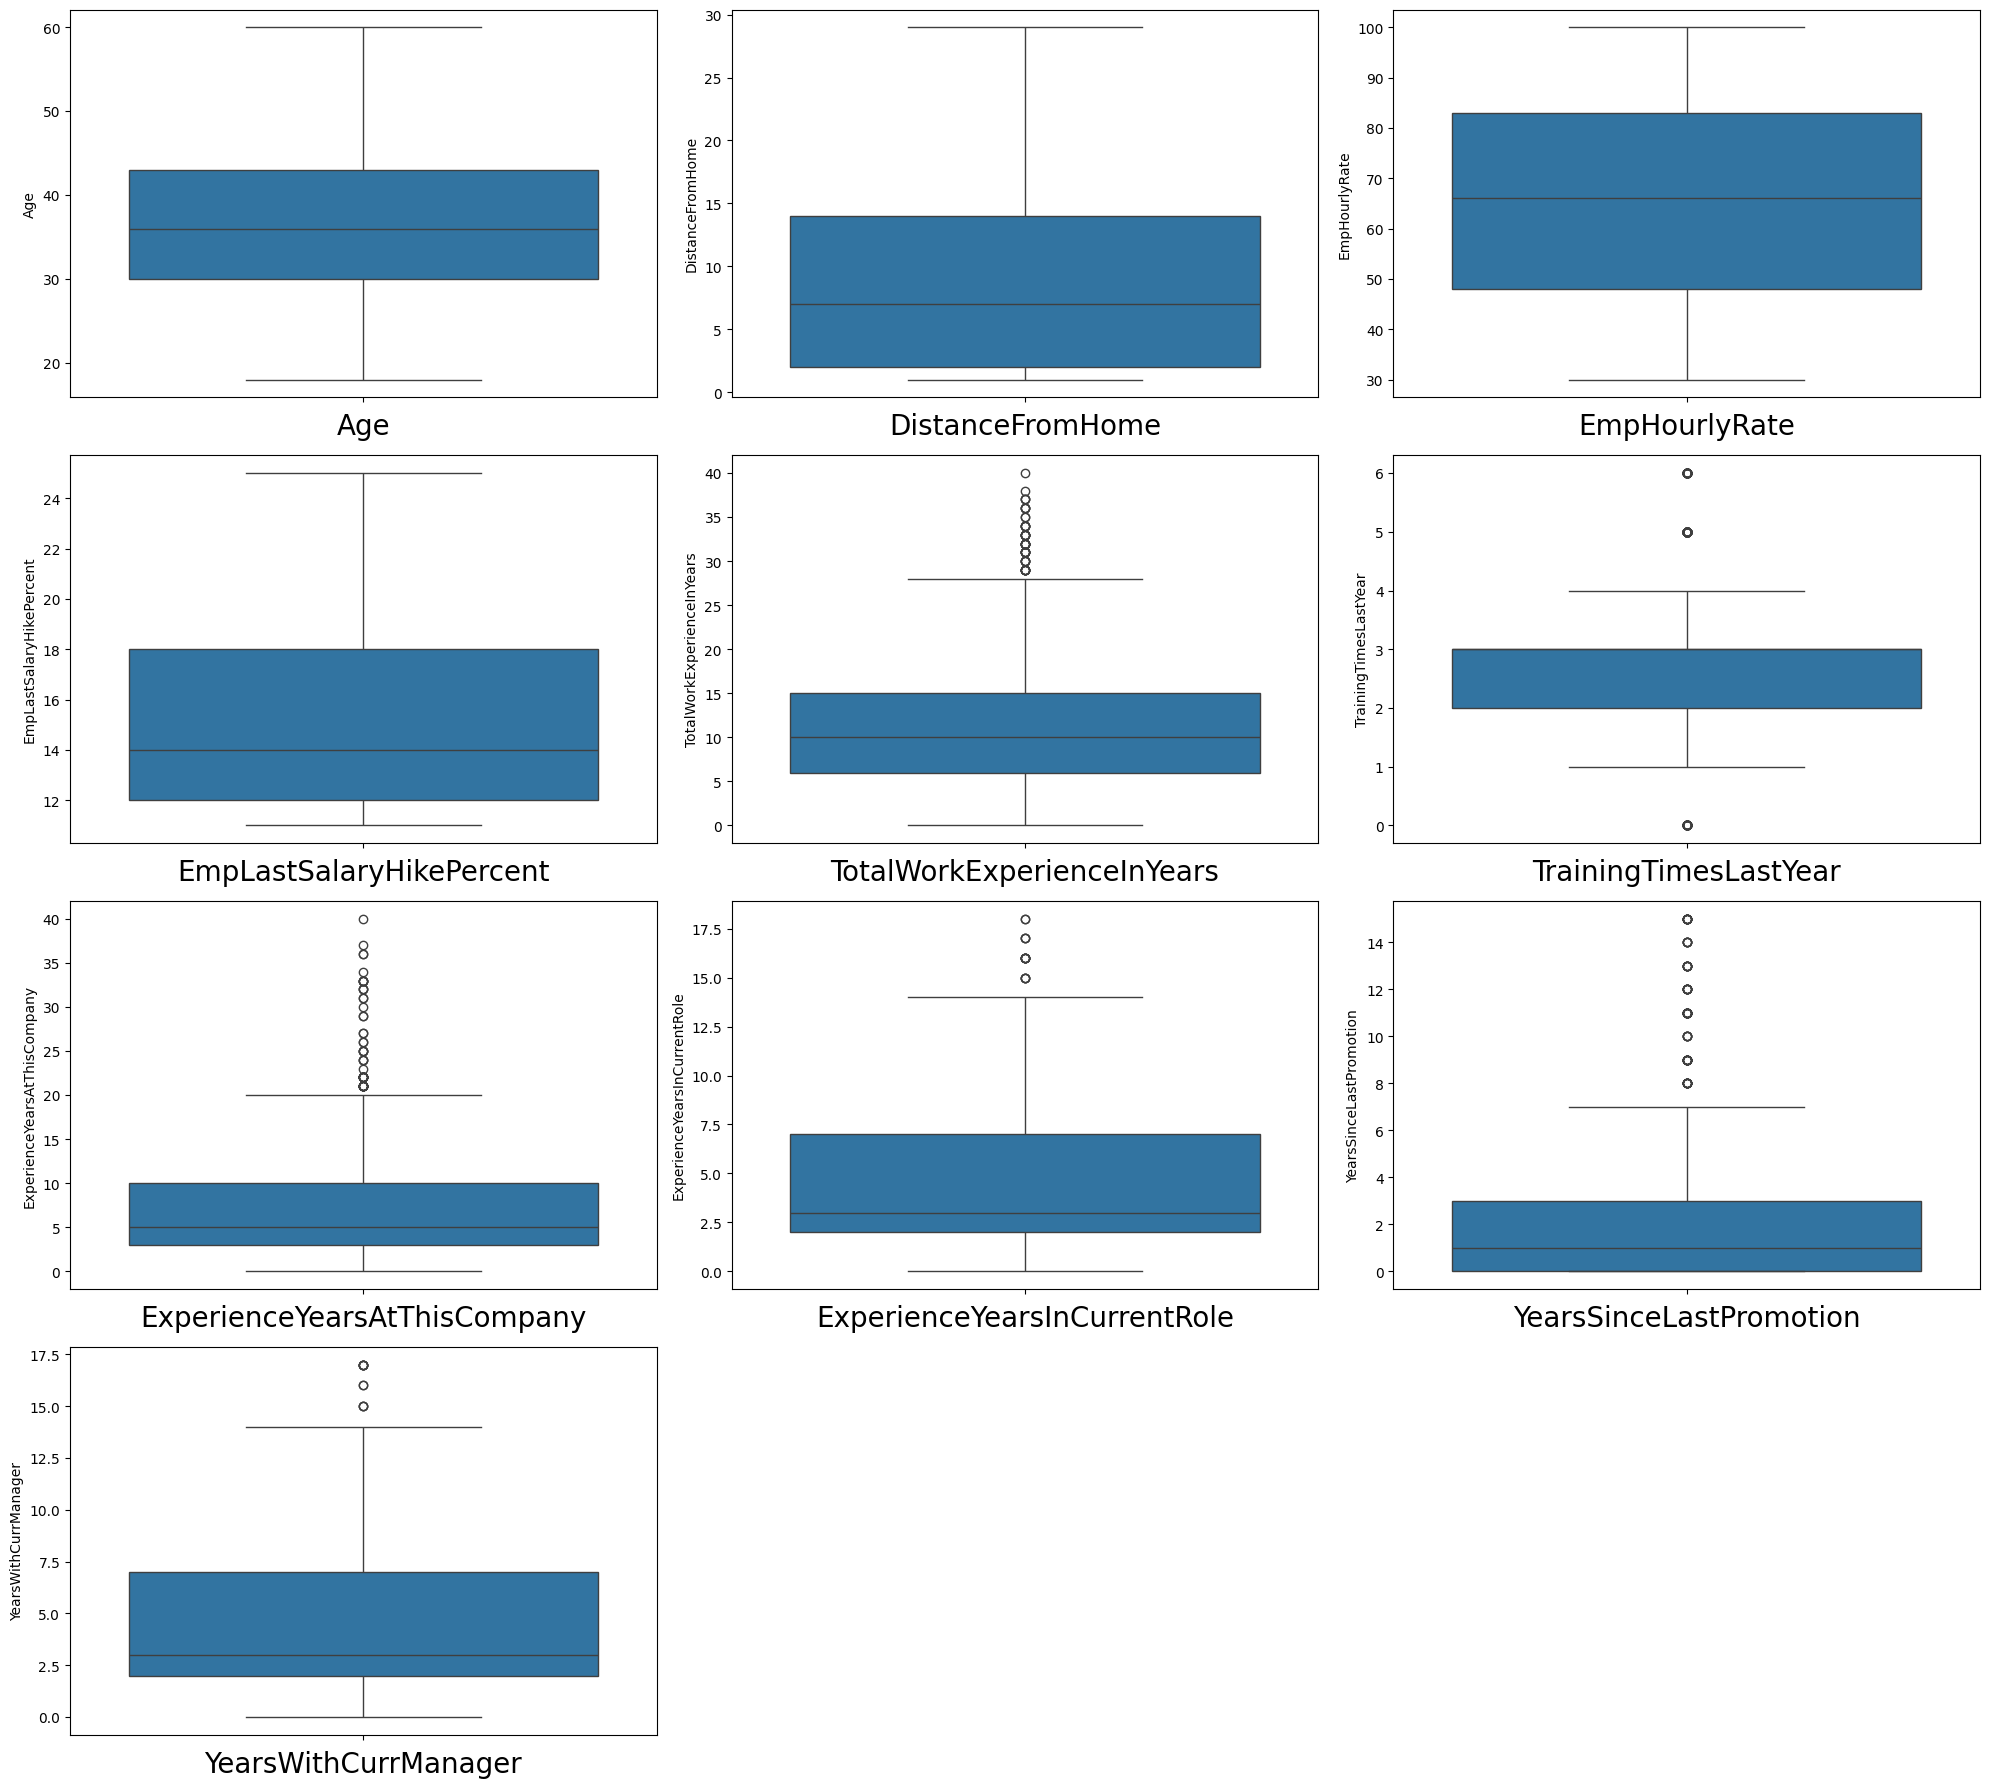

In [6]:
out = data[
    [
        "Age",
        "DistanceFromHome",
        "EmpHourlyRate",
        "EmpLastSalaryHikePercent",
        "TotalWorkExperienceInYears",
        "TrainingTimesLastYear",
        "ExperienceYearsAtThisCompany",
        "ExperienceYearsInCurrentRole",
        "YearsSinceLastPromotion",
        "YearsWithCurrManager",
    ]
]


plt.figure(figsize=(20, 18))  # defining canvas size

plotno = 1  # counter


for column in out:  # iteration of columns / acessing the columns from count

    if plotno <= 12:  # set the limit

        plt.subplot(
            4, 3, plotno
        )  # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count

        sns.boxplot(out[column])  # Plotting box plots to detect the outlier

        plt.xlabel(column, fontsize=20)  # assigning name to x-axis and font size is 20

    plotno += 1  # counter increment

plt.tight_layout()

plt.show()  # used to hide the storage loction

- Here we are use inter quatile range to impute the outlier, becuase data is not normally distributed.


**IQR:**

- IQR stand for the interquatile range, When a data set has outliers or extreme values, we summarize a typical value using the median as opposed to the mean. which is the difference between the first and third quartiles


#### 1.Total Work Experiance in year


In [7]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data["TotalWorkExperienceInYears"], interpolation="midpoint")
print("IQR:", iqr)

# Getting first & third quantile
Q1 = data["TotalWorkExperienceInYears"].quantile(0.25)
Q3 = data["TotalWorkExperienceInYears"].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5 * iqr
print("Minimum limit:", min_limit)

max_limit = Q3 + 1.5 * iqr
print("Maximum Limit:", max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [8]:
# Impute outlier
data.loc[
    data["TotalWorkExperienceInYears"] > max_limit, "TotalWorkExperienceInYears"
] = data["TotalWorkExperienceInYears"].median()

In [9]:
# filtering data after imputation
data.loc[data["TotalWorkExperienceInYears"] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 2.Training Times Last Year


In [10]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data["TrainingTimesLastYear"], interpolation="midpoint")
print("IQR:", iqr)

# Getting first & third quantile
Q1 = data["TrainingTimesLastYear"].quantile(0.25)
Q3 = data["TrainingTimesLastYear"].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5 * iqr
print("Minimum limit:", min_limit)

max_limit = Q3 + 1.5 * iqr
print("Maximum Limit:", max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [11]:
# Impute outlier in max & minmum limit
data.loc[data["TrainingTimesLastYear"] < min_limit, "TrainingTimesLastYear"] = data[
    "TrainingTimesLastYear"
].median()
data.loc[data["TrainingTimesLastYear"] > max_limit, "TrainingTimesLastYear"] = data[
    "TrainingTimesLastYear"
].median()

In [12]:
# Filtering the min limit
data.loc[data["TrainingTimesLastYear"] < min_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [13]:
# Filtering the max limit
data.loc[data["TrainingTimesLastYear"] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 3.Experience Years At This Company


In [14]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data["ExperienceYearsAtThisCompany"], interpolation="midpoint")
print("IQR:", iqr)

# Getting first & third quantile
Q1 = data["ExperienceYearsAtThisCompany"].quantile(0.25)
Q3 = data["ExperienceYearsAtThisCompany"].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5 * iqr
print("Minimum limit:", min_limit)

max_limit = Q3 + 1.5 * iqr
print("Maximum Limit:", max_limit)

IQR: 7.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [15]:
# Impute outlier
data.loc[
    data["ExperienceYearsAtThisCompany"] > max_limit, "ExperienceYearsAtThisCompany"
] = data["ExperienceYearsAtThisCompany"].median()

In [16]:
# Filtering the data
data.loc[data["ExperienceYearsAtThisCompany"] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 4.Experience Years In Current Role


In [17]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data["ExperienceYearsInCurrentRole"], interpolation="midpoint")
print("IQR:", iqr)

# Getting first & third quantile
Q1 = data["ExperienceYearsInCurrentRole"].quantile(0.25)
Q3 = data["ExperienceYearsInCurrentRole"].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5 * iqr
print("Minimum limit:", min_limit)

max_limit = Q3 + 1.5 * iqr
print("Maximum Limit:", max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [18]:
# Impute the outlier
data.loc[
    data["ExperienceYearsInCurrentRole"] > max_limit, "ExperienceYearsInCurrentRole"
] = data["ExperienceYearsInCurrentRole"].median()

In [19]:
# Filtering the data
data.loc[data["ExperienceYearsInCurrentRole"] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 5.Years Since Last Promotion


In [20]:
# use iqr because some skewed in data
iqr = stats.iqr(data["YearsSinceLastPromotion"], interpolation="midpoint")
print("IQR:", iqr)

# Get first and third quantile
Q1 = data["YearsSinceLastPromotion"].quantile(0.25)
Q3 = data["YearsSinceLastPromotion"].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5 * iqr
print("Minimum limit:", min_limit)

max_limit = Q3 + 1.5 * iqr
print("Maximum limit", max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit 7.5


In [21]:
# impute outlier
data.loc[data["YearsSinceLastPromotion"] > max_limit, "YearsSinceLastPromotion"] = data[
    "YearsSinceLastPromotion"
].median()

In [22]:
# Filtering data
data.loc[data["YearsSinceLastPromotion"] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 6.Years With Current Manager


In [23]:
# use iqr because some skewed in data
iqr = stats.iqr(data["YearsWithCurrManager"], interpolation="midpoint")
print("IQR:", iqr)

# Get first and third quantile
Q1 = data["YearsWithCurrManager"].quantile(0.25)
Q3 = data["YearsWithCurrManager"].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5 * iqr
print("Minimum limit:", min_limit)

max_limit = Q3 + 1.5 * iqr
print("Maximum limit", max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum limit 14.5


In [24]:
# impute outlier
data.loc[data["YearsWithCurrManager"] > max_limit, "YearsWithCurrManager"] = data[
    "YearsWithCurrManager"
].median()

In [25]:
# Filtering the data
data.loc[data["YearsWithCurrManager"] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### CHECKING OUTLIER AFTER IMPUTATION


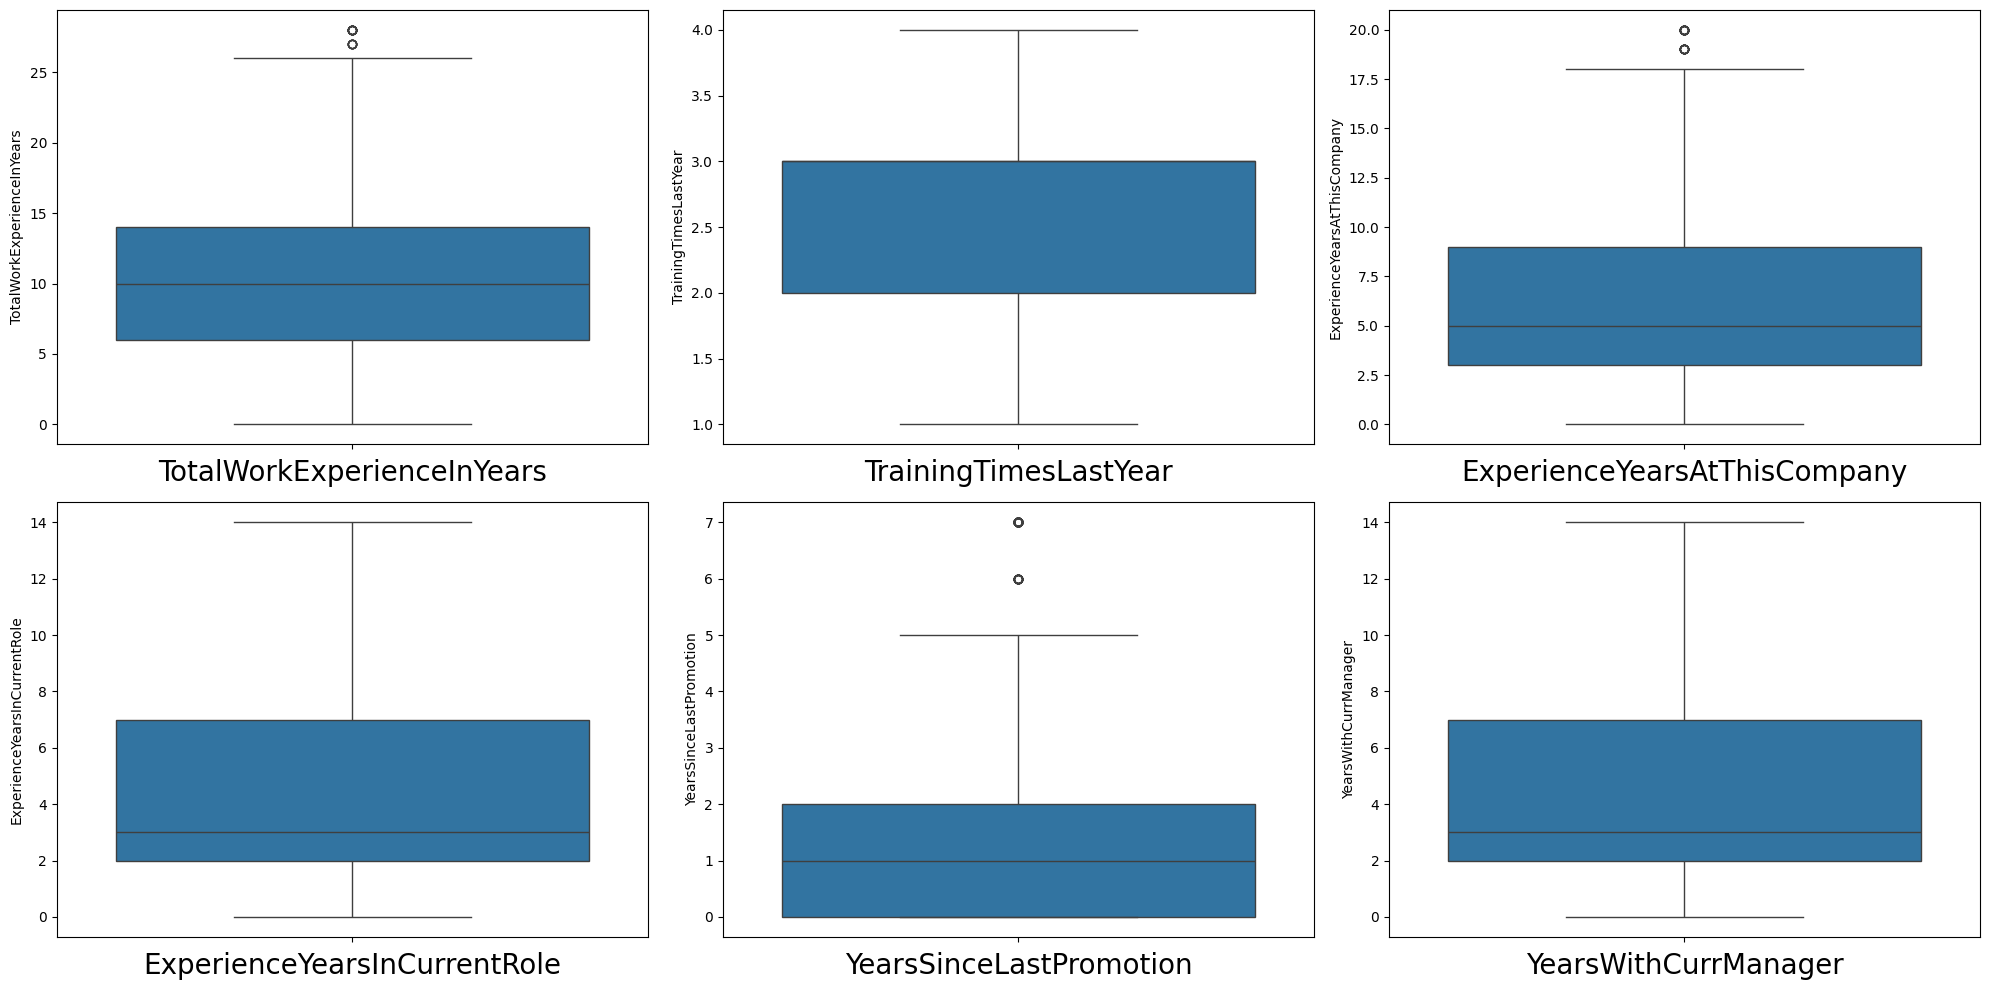

In [26]:
out = data[
    [
        "TotalWorkExperienceInYears",
        "TrainingTimesLastYear",
        "ExperienceYearsAtThisCompany",
        "ExperienceYearsInCurrentRole",
        "YearsSinceLastPromotion",
        "YearsWithCurrManager",
    ]
]


plt.figure(figsize=(20, 10))  # defining canvas size

plotno = 1  # counter


for column in out:  # iteration of columns / acessing the columns from count

    if plotno <= 7:  # set the limit

        plt.subplot(
            2, 3, plotno
        )  # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count

        sns.boxplot(out[column])  # Plotting box plots to detect the outlier

        plt.xlabel(column, fontsize=20)  # assigning name to x-axis and font size is 20

    plotno += 1  # counter increment

plt.tight_layout()

plt.show()  # used to hide the storage loction

**Observation:**

- Outlier impute sucessfully, but some feature box plot showing outlier, so we can not impute this outlier.


### FEATURE TRANSFORMATION


- From the last EDA file we get the yearsince last promotion feature have some skewed in data, so we are going to use square root transformation.


**Q-Q Plot:** Q–Q plot is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other.


In [27]:
# define a function to plot a Q-Q plot
def plot_data(data, feature):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    data[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(data[feature], dist="norm", plot=pylab)
    plt.show()

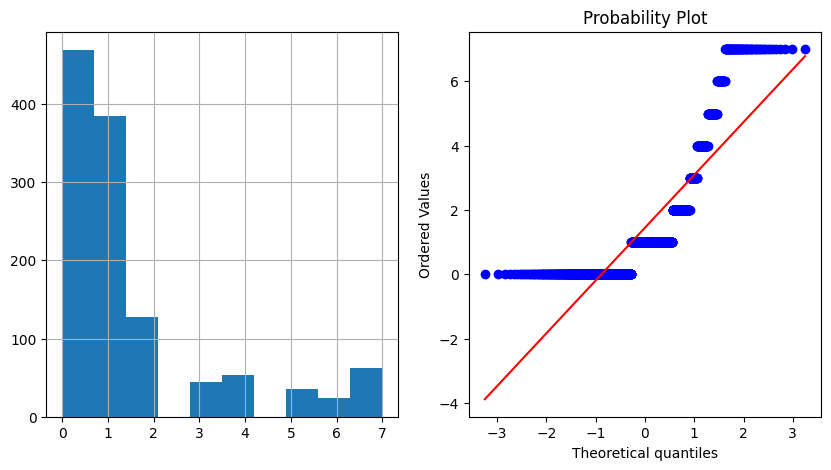

In [28]:
plot_data(data, "YearsSinceLastPromotion")

#### SQUARE ROOT TRANSFORMATION


In [29]:
data["square_YearsSinceLastPromotion"] = data.YearsSinceLastPromotion ** (1 / 2)

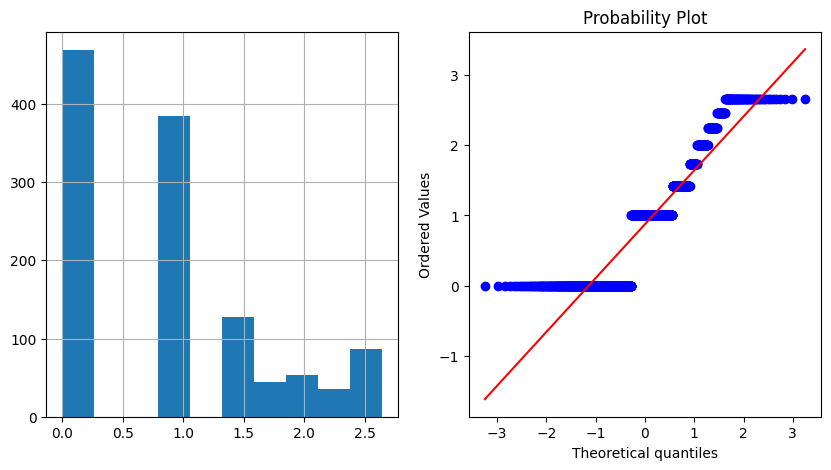

In [30]:
plot_data(data, "square_YearsSinceLastPromotion")

- Now some points are close to the line.


### SCALING THE DATA


**Standard Scaling:**
Standardization is the process of scaling the feature, it assumes the feature follow normal distribution and scale the feature between mean and standard deviation, here mean is 0 and standard deviation is always 1.


In [31]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()  # Create Object

data[
    [
        "Age",
        "DistanceFromHome",
        "EmpHourlyRate",
        "EmpLastSalaryHikePercent",
        "TotalWorkExperienceInYears",
        "TrainingTimesLastYear",
        "ExperienceYearsAtThisCompany",
        "ExperienceYearsInCurrentRole",
        "YearsWithCurrManager",
        "square_YearsSinceLastPromotion",
    ]
] = scalar.fit_transform(
    data[
        [
            "Age",
            "DistanceFromHome",
            "EmpHourlyRate",
            "EmpLastSalaryHikePercent",
            "TotalWorkExperienceInYears",
            "TrainingTimesLastYear",
            "ExperienceYearsAtThisCompany",
            "ExperienceYearsInCurrentRole",
            "YearsWithCurrManager",
            "square_YearsSinceLastPromotion",
        ]
    ]
)

In [32]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
0,-0.541458,1,2,2,5,13,2,0.102061,3,4,-0.543569,3,2,4,1,0,-0.889111,4,-0.058535,-0.879579,2,0.868276,0.864098,0,1.202103,0,3,-1.057559
1,1.109888,1,2,2,5,13,2,0.591464,4,4,-1.187042,3,2,1,2,0,-0.889111,4,1.512870,-0.879579,3,0.200371,0.864098,1,0.902825,0,3,0.151501
2,0.339260,1,1,1,5,13,1,-0.509693,4,4,-0.890055,2,3,1,5,1,1.594054,3,1.512870,-0.879579,3,2.649355,2.661702,1,2.399219,0,4,0.151501
3,0.449349,1,0,0,3,8,2,0.102061,4,2,0.347393,2,5,4,3,0,-0.061389,2,1.984292,-0.879579,2,-0.244898,0.564498,1,0.603546,0,3,0.151501
4,2.541054,1,2,2,5,13,2,0.836165,4,1,0.891870,3,2,1,8,0,-0.337297,4,-0.058535,-2.303999,3,-0.912803,-0.633905,2,-0.593570,0,3,0.652311


### FEATURE SELECTION


#### DROP UNIQUE AND CONTANT FEATURES


In [33]:
# Dropping Years Since Last Promotion because we create a new feature
data.drop(["YearsSinceLastPromotion"], axis=1, inplace=True)

#### CHECKING CORELATION

**Heatmap:** A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.


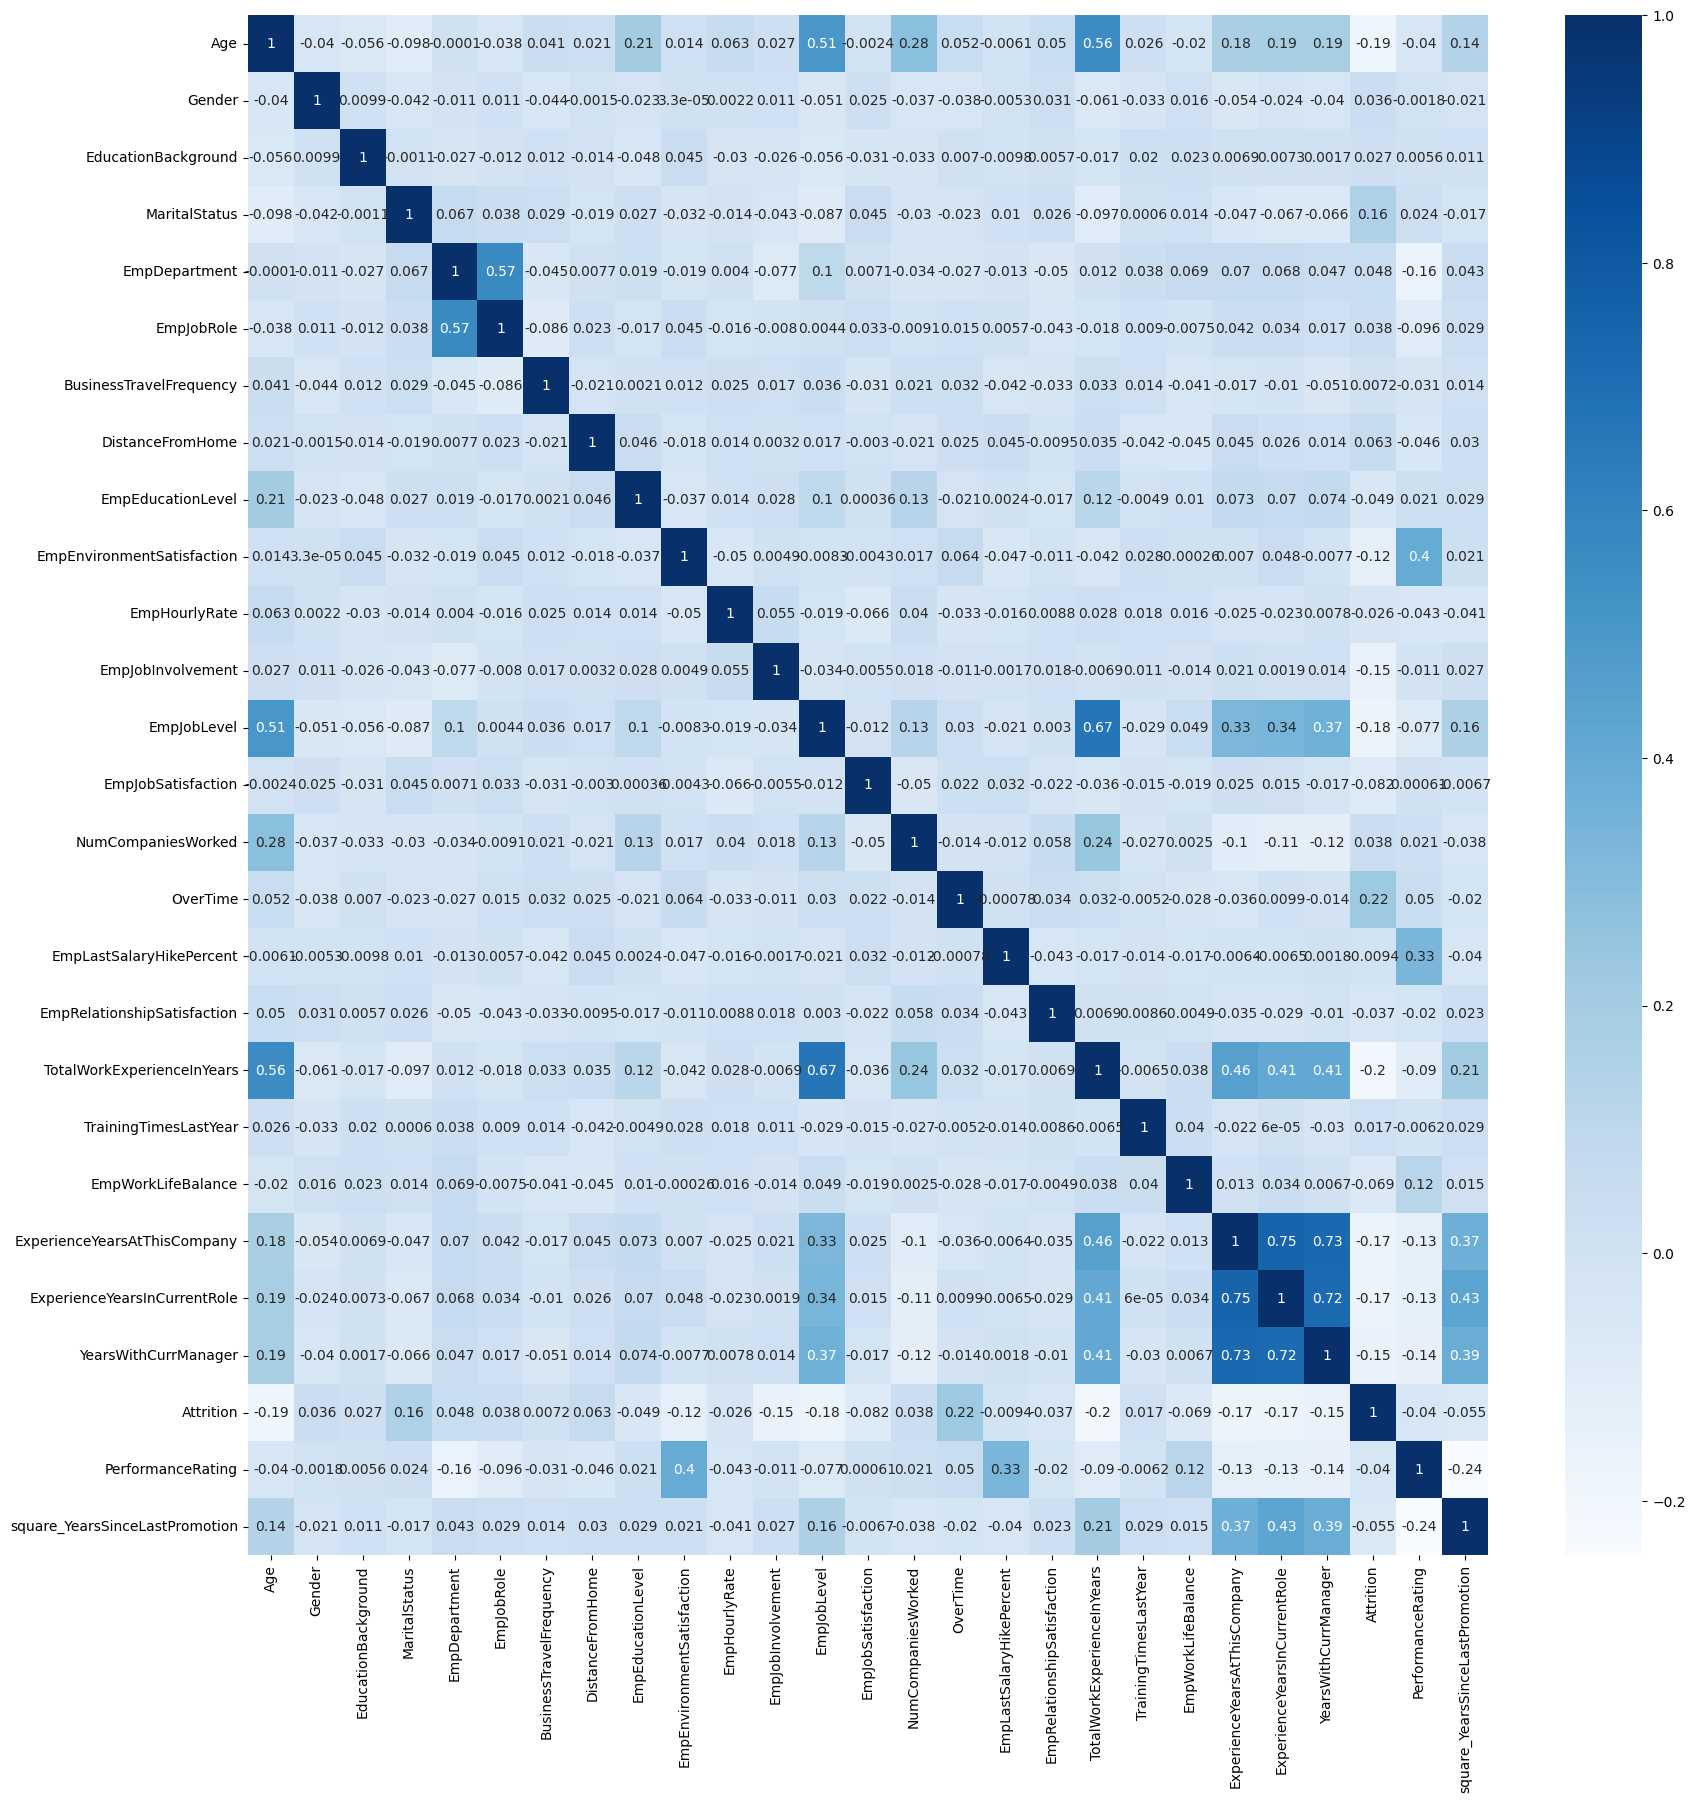

In [34]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap="Blues")
plt.show()

- From above heatmap scale we are clearly seen the their is no highly correlated feature in data
- But we confirm with the help of simple code


In [35]:
# To get highly corelated feature
pd.set_option("display.max_rows", None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.9]  # Set threshold 0.9
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ["feature1", "feature2", "corr"]
corrmat

,feature1,feature2,corr


- Now we confirm their is no highly correlated feature is present.


#### CHECKING DUPLICATES


In [38]:
data.duplicated().sum()

0

- Their is no Duplicates is present in data.


#### PRINCIPLE COMPONENT ANALYSIS


- Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. Formally, PCA is a statistical technique for reducing the dimensionality of a dataset.


**Used For:** The dataset contain more than 25 feature, removes the noise in the data and keeps only the most important features in the dataset. That will mitigate the overfitting of the data and increase the model's performance.


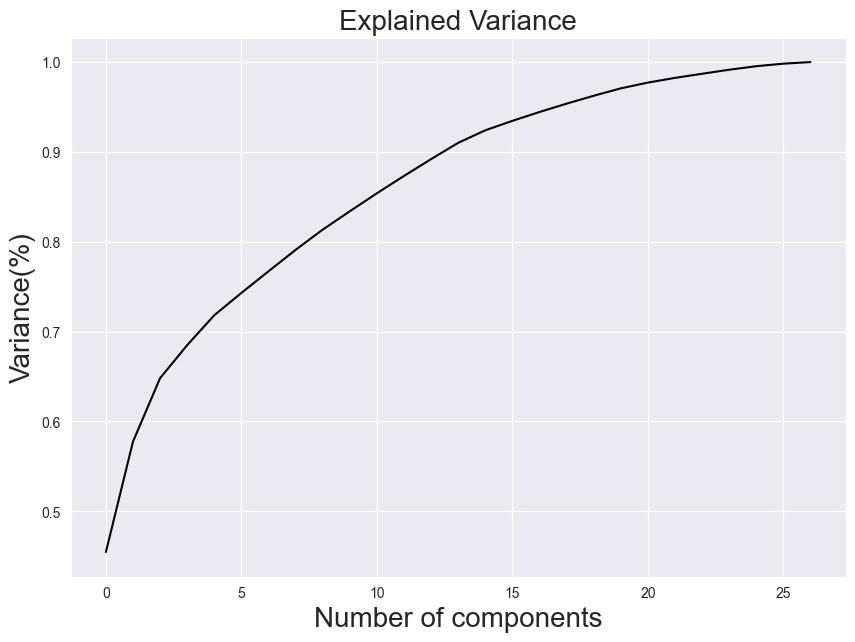

In [36]:
# Getting the optimal value of PCA
from sklearn.decomposition import PCA

# Object creation
pca = PCA()

principlecomponent = pca.fit_transform(data)
plt.figure(figsize=(10, 7))
sns.set_style("darkgrid")
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="k")
plt.xlabel("Number of components", fontsize=20)
plt.ylabel("Variance(%)", fontsize=20)  # for each componant
plt.title("Explained Variance", fontsize=20)
plt.show()

**Observation:** Data is contain total 27 feature after dropping unique and constant column,from above PCA it shows the 25 feature has less varaince loss, so we are going to select 25 feature.


In [38]:
# Selecting the components
pca = PCA(n_components=25)
new_data = pca.fit_transform(data)
new_data

array([[ 4.29306604, -1.75332333,  0.91922833, ...,  0.58316801,
        -0.12978528, -0.34065275],
       [ 4.24376668, -0.18475581,  1.89893324, ...,  0.93469766,
         0.36334516, -0.71031361],
       [ 4.28323973,  2.48275173,  4.22655269, ...,  0.38681423,
         0.36839562,  0.64124163],
       ...,
       [ 5.40569153, -1.53118033,  2.62987726, ...,  0.09344801,
        -0.35102628,  1.12163327],
       [-8.47243861, -1.82619596,  1.73719449, ..., -0.50059978,
        -0.16927705, -0.38385163],
       [ 4.21461167,  5.82108361, -2.23043229, ..., -0.57304716,
         0.01997754, -0.04661372]])

#### CREATE NEW DATAFRAME


In [41]:
principle_df = pd.DataFrame(
    data=new_data,
    columns=[
        "pca1",
        "pca2",
        "pca3",
        "pca4",
        "pca5",
        "pca6",
        "pca7",
        "pca8",
        "pca9",
        "pca10",
        "pca11",
        "pca12",
        "pca13",
        "pca14",
        "pca15",
        "pca16",
        "pca17",
        "pca18",
        "pca19",
        "pca20",
        "pca21",
        "pca22",
        "pca23",
        "pca24",
        "pca25",
    ],
)

# Add target veriable to preprocess dataframe for model building & evaluation

principle_df["PerformanceRating"] = data.PerformanceRating


principle_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,4.293066,-1.753323,0.919228,0.336102,0.003972,-1.095194,0.721634,0.506405,1.569791,0.830610,-0.393545,-1.137103,0.357645,-0.877366,-1.553942,0.186472,-1.215891,0.485867,-0.209077,-0.142136,-0.157099,-0.188476,0.583168,-0.129785,-0.340653,3
1,4.243767,-0.184756,1.898933,0.432110,0.220051,0.391057,-0.809763,1.789957,0.283441,1.728833,-0.480577,-1.487947,-1.074702,-0.101309,-0.192023,0.279945,-0.707606,0.714481,0.903575,0.614434,0.493414,-0.277186,0.934698,0.363345,-0.710314,3
2,4.283240,2.482752,4.226553,0.132504,-0.446849,-1.796433,-0.538017,1.023429,-1.290777,1.356063,-1.583111,0.693025,-1.590678,-1.537099,-1.386141,0.162587,0.134075,-0.606040,0.353685,0.198341,0.226922,0.267362,0.386814,0.368396,0.641242,4
3,-1.057301,0.967936,2.644271,0.881411,-2.580350,1.324758,1.478447,-0.487540,-0.174190,-0.584436,-0.094342,-0.826246,0.218734,-0.308611,0.152452,0.054582,0.468795,-0.978412,-1.772310,-0.384484,0.163351,0.066831,0.657742,0.145463,-0.469729,3
4,4.118858,5.827044,-0.368112,1.340383,-0.022531,1.649781,-1.988170,-0.948191,0.075893,1.460704,-0.772745,-1.411593,0.150553,-0.858603,1.648908,0.093410,-0.602156,0.492509,1.331327,0.775274,-0.811129,0.161245,0.306935,-0.368420,-0.120767,3


### SAVE PRE-PROCESS DATA


In [ ]:
principle_df.to_csv(r"E:\IABAC_Project\Data\employee_performance_preprocessed_data.csv")

# Reading new preprocess csv file
df = pd.read_csv(r"E:\IABAC_Project\Data\employee_performance_preprocessed_data.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
# Get first five rows
df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,4.293066,-1.753323,0.919228,0.336102,0.003972,-1.095194,0.721634,0.506405,1.569791,0.830610,-0.393545,-1.137103,0.357645,-0.877366,-1.553942,0.186472,-1.215891,0.485867,-0.209077,-0.142136,-0.157099,-0.188476,0.583168,-0.129785,-0.340653,3
1,4.243767,-0.184756,1.898933,0.432110,0.220051,0.391057,-0.809763,1.789957,0.283441,1.728833,-0.480577,-1.487947,-1.074702,-0.101309,-0.192023,0.279945,-0.707606,0.714481,0.903575,0.614434,0.493414,-0.277186,0.934698,0.363345,-0.710314,3
2,4.283240,2.482752,4.226553,0.132504,-0.446849,-1.796433,-0.538017,1.023429,-1.290777,1.356063,-1.583111,0.693025,-1.590678,-1.537099,-1.386141,0.162587,0.134075,-0.606040,0.353685,0.198341,0.226922,0.267362,0.386814,0.368396,0.641242,4
3,-1.057301,0.967936,2.644271,0.881411,-2.580350,1.324758,1.478447,-0.487540,-0.174190,-0.584436,-0.094342,-0.826246,0.218734,-0.308611,0.152452,0.054582,0.468795,-0.978412,-1.772310,-0.384484,0.163351,0.066831,0.657742,0.145463,-0.469729,3
4,4.118858,5.827044,-0.368112,1.340383,-0.022531,1.649781,-1.988170,-0.948191,0.075893,1.460704,-0.772745,-1.411593,0.150553,-0.858603,1.648908,0.093410,-0.602156,0.492509,1.331327,0.775274,-0.811129,0.161245,0.306935,-0.368420,-0.120767,3


### MODEL CREATION & EVALUATION SUMMARY:

- Loading pre-process data
- Define dependant & independant features
- Balancing the target feature
- Split training and testing data
- Model creation, prediction & evaluation
- Model saving


### LOADING PREPROCESS DATA


In [46]:
data = pd.read_csv(r"E:\IABAC_Project\Data\employee_performance_preprocessed_data.csv")
pd.set_option("display.max_columns", None)  # Used to display the all features
data.drop("Unnamed: 0", axis=1, inplace=True)  # Drop unwanted feature
data.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,4.293066,-1.753323,0.919228,0.336102,0.003972,-1.095194,0.721634,0.506405,1.569791,0.830610,-0.393545,-1.137103,0.357645,-0.877366,-1.553942,0.186472,-1.215891,0.485867,-0.209077,-0.142136,-0.157099,-0.188476,0.583168,-0.129785,-0.340653,3
1,4.243767,-0.184756,1.898933,0.432110,0.220051,0.391057,-0.809763,1.789957,0.283441,1.728833,-0.480577,-1.487947,-1.074702,-0.101309,-0.192023,0.279945,-0.707606,0.714481,0.903575,0.614434,0.493414,-0.277186,0.934698,0.363345,-0.710314,3
2,4.283240,2.482752,4.226553,0.132504,-0.446849,-1.796433,-0.538017,1.023429,-1.290777,1.356063,-1.583111,0.693025,-1.590678,-1.537099,-1.386141,0.162587,0.134075,-0.606040,0.353685,0.198341,0.226922,0.267362,0.386814,0.368396,0.641242,4
3,-1.057301,0.967936,2.644271,0.881411,-2.580350,1.324758,1.478447,-0.487540,-0.174190,-0.584436,-0.094342,-0.826246,0.218734,-0.308611,0.152452,0.054582,0.468795,-0.978412,-1.772310,-0.384484,0.163351,0.066831,0.657742,0.145463,-0.469729,3
4,4.118858,5.827044,-0.368112,1.340383,-0.022531,1.649781,-1.988170,-0.948191,0.075893,1.460704,-0.772745,-1.411593,0.150553,-0.858603,1.648908,0.093410,-0.602156,0.492509,1.331327,0.775274,-0.811129,0.161245,0.306935,-0.368420,-0.120767,3


### DEFINE INDEPENDANT & DEPENDANT FEATURES


In [47]:
X = data.iloc[:, :-1]
y = data.PerformanceRating

In [48]:
X.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,4.293066,-1.753323,0.919228,0.336102,0.003972,-1.095194,0.721634,0.506405,1.569791,0.830610,-0.393545,-1.137103,0.357645,-0.877366,-1.553942,0.186472,-1.215891,0.485867,-0.209077,-0.142136,-0.157099,-0.188476,0.583168,-0.129785,-0.340653
1,4.243767,-0.184756,1.898933,0.432110,0.220051,0.391057,-0.809763,1.789957,0.283441,1.728833,-0.480577,-1.487947,-1.074702,-0.101309,-0.192023,0.279945,-0.707606,0.714481,0.903575,0.614434,0.493414,-0.277186,0.934698,0.363345,-0.710314
2,4.283240,2.482752,4.226553,0.132504,-0.446849,-1.796433,-0.538017,1.023429,-1.290777,1.356063,-1.583111,0.693025,-1.590678,-1.537099,-1.386141,0.162587,0.134075,-0.606040,0.353685,0.198341,0.226922,0.267362,0.386814,0.368396,0.641242
3,-1.057301,0.967936,2.644271,0.881411,-2.580350,1.324758,1.478447,-0.487540,-0.174190,-0.584436,-0.094342,-0.826246,0.218734,-0.308611,0.152452,0.054582,0.468795,-0.978412,-1.772310,-0.384484,0.163351,0.066831,0.657742,0.145463,-0.469729
4,4.118858,5.827044,-0.368112,1.340383,-0.022531,1.649781,-1.988170,-0.948191,0.075893,1.460704,-0.772745,-1.411593,0.150553,-0.858603,1.648908,0.093410,-0.602156,0.492509,1.331327,0.775274,-0.811129,0.161245,0.306935,-0.368420,-0.120767


In [49]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

### BALANCING THE TARGET FEATURE


**SMOTE:** SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.


In [ ]:
from collections import Counter
from imblearn.over_sampling import (
    SMOTE,
)  # SMOTE(synthetic minority oversampling technique)

sm = SMOTE()  # obeject creation
print("unbalanced data   :  ", Counter(y))
X_sm, y_sm = sm.fit_resample(X, y)
print("balanced data:    :", Counter(y_sm))

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


- Now target feature in balance


### SPLIT TRAINING AND TESTING DATA


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, random_state=42, test_size=0.20
)

In [59]:
X_train.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
1760,4.291462,-1.715955,1.657070,1.006340,-0.082835,-0.609272,-2.392782,-0.193902,0.695588,-0.212153,0.886866,0.785216,-1.311277,0.511011,0.877440,0.406567,0.093611,-0.265478,0.059090,-0.006057,-0.218814,0.166651,0.429137,-0.107386,0.133138
1521,4.218793,6.367889,1.848775,0.834042,-0.289213,-1.478259,-1.338518,-1.010873,0.144808,-0.116747,-0.497178,0.122053,-0.401891,-0.506481,1.678612,0.185469,-0.935812,0.121731,0.002657,-0.149361,-0.971090,0.277011,0.387545,0.228385,0.645119
166,6.973271,4.766278,3.815002,-0.726881,-1.082964,-0.948025,-0.042107,-0.059359,-0.438304,-0.398738,1.358769,0.380962,-0.001553,-0.387789,-0.030867,1.319245,-0.356595,-0.261766,0.332551,0.644076,0.945719,0.297672,0.634946,-0.170712,-0.178723
976,-6.383089,-2.812573,-1.131183,0.048850,-1.537453,0.457739,-1.115372,-0.627601,1.602579,-0.661013,0.879173,-0.033431,-0.929769,-0.037878,-0.026657,0.285768,0.575230,0.374094,-0.934315,0.022683,0.008468,-0.059428,-0.718772,-0.178248,-0.203873
49,-6.418987,-1.870834,-2.947972,-0.064011,-1.245093,0.292016,-1.728418,0.516368,0.719510,-0.675842,-1.688466,-2.233152,-1.759195,-0.758153,-0.136865,0.193235,-0.043475,-0.454139,0.167350,0.829706,-0.274369,0.012146,-0.760830,0.560118,0.580876


In [60]:
# Check shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2097, 25), (525, 25), (2097,), (525,))

### MODEL CREATION, PREDICTION AND EVALUATION


#### AIM

- Create a sweet spot model (Low bias, Low variance)

#### HERE WE WILL BE EXPERIMENTING WITH THREE ALGORITHM

- Support Vector Machine
- Random Forest
- Artificial Neural Network [MLP Classifier]


### 1.Support Vector Machine


In [61]:
# importing library
from sklearn.svm import SVC

# Object Creation
svc = SVC()

# Fitting training and testing data
svc.fit(X_train, y_train)

# Prediction on train data
svc_train_predict = svc.predict(X_train)

# Prediction on test data
svc_test_predict = svc.predict(X_test)

#### TRAINING ACCURACY


In [62]:
# import metrics
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    classification_report,
    confusion_matrix,
)

svc_train_accuracy = accuracy_score(svc_train_predict, y_train)
print("Training accuracy of support vector classifier model", svc_train_accuracy * 100)
print(
    "support vector classifier Classification report: \n",
    classification_report(svc_train_predict, y_train),
)

Training accuracy of support vector classifier model 97.13876967095851
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.99      0.96      0.98       713
           3       0.94      0.98      0.96       673
           4       0.98      0.98      0.98       711

    accuracy                           0.97      2097
   macro avg       0.97      0.97      0.97      2097
weighted avg       0.97      0.97      0.97      2097



- Support vector classifier perform well on training data


#### TESTING ACCURACY


In [63]:
svc_test_accuracy = accuracy_score(svc_test_predict, y_test)
print("Testing accuracy of support vector classifier model", svc_test_accuracy * 100)
print(
    "Prcision Score:",
    precision_score(svc_test_predict, y_test, average="weighted") * 100,
)
print(
    "support vector classifier Classification report: \n",
    classification_report(svc_test_predict, y_test),
)

Testing accuracy of support vector classifier model 94.85714285714286
Prcision Score: 95.37552849740048
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.99      0.95      0.97       193
           3       0.86      0.98      0.92       152
           4       0.99      0.92      0.95       180

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.95      0.95      0.95       525



In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


pd.crosstab(svc_test_predict, y_test)

PerformanceRating,2,3,4
row_0,,,
2,183,10,0
3,1,149,2
4,0,14,166


### 2.Random Forest


In [65]:
# importing libary and creating object
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)  # 100 decision tree

# fitting training data
rf.fit(X_train, y_train)

# Prediction on testing data
rf_test_predict = rf.predict(X_test)

# Prediction on training data
rf_train_predict = rf.predict(X_train)

#### TRANING ACCURACY


In [66]:
rf_train_accuracy = accuracy_score(rf_train_predict, y_train)
print("Training accuracy of random forest", rf_train_accuracy)
print(
    "Classification report of training: \n",
    classification_report(rf_train_predict, y_train),
)

Training accuracy of random forest 1.0
Classification report of training: 
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       701
           4       1.00      1.00      1.00       706

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



- Random forest classifier very well work on training data.


#### TESTING ACCURACY


In [67]:
rf_test_accuracy = accuracy_score(rf_test_predict, y_test)
print("Testing accuracy of random forest", rf_test_accuracy * 100)
print(
    "Precision Score:",
    precision_score(rf_test_predict, y_test, average="weighted") * 100,
)
print(
    "Classification report of testing: \n",
    classification_report(rf_test_predict, y_test),
)

Testing accuracy of random forest 96.19047619047619
Precision Score: 96.26955290786834
Classification report of testing: 
               precision    recall  f1-score   support

           2       0.97      0.97      0.97       184
           3       0.92      0.96      0.94       167
           4       0.99      0.96      0.98       174

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



#### HYPER PARAMETER TUNNING WITH RANDOMIZED SEARCH CV


In [68]:
# import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV

# In random forest we are not used grid search CV because of memory reason.

n_estimators = [
    int(x) for x in np.linspace(start=100, stop=2000, num=10)
]  # No of decision tree in forest
max_features = [
    "sqrt",
    "log2",
    None,
]  # Max no of feature consider to create decision tree
max_depth = [
    int(x) for x in np.linspace(10, 100, num=11)
]  # Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [
    2,
    3,
    5,
    8,
]  # Min number of data points placed in a node before the node is split
min_samples_leaf = [1, 2, 3, 4]  # Min number of data point allowed in leaf node

# Creating dictionary of parameter
random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
}

# Object creation
rf_clf = RandomForestClassifier(
    random_state=42
)  # Provide random state because select rows and columns randomly

# Create Random search CV with parameter
rf_cv = RandomizedSearchCV(
    estimator=rf_clf,
    scoring="f1",
    param_distributions=random_grid,
    n_iter=10,
    cv=2,
    verbose=2,
    random_state=1,
    n_jobs=-1,
)

# Fitting the training data
rf_cv.fit(X_train, y_train)

# Get best parameter
rf_best_params = rf_cv.best_params_
print(f"Best parameter: {rf_best_params}")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameter: {'n_estimators': 1577, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 100}


In [69]:
# Create object and place the best parameter
rf_clf1 = RandomForestClassifier(**rf_best_params)

# Fitting the training data
rf_clf1.fit(X_train, y_train)

# Prediction on test data
rf_clf1_predict = rf_clf1.predict(X_test)

#### TEST ACCURACY AFTER HYPER-PARAMETER TUNNING


In [70]:
rf_accuracy = accuracy_score(rf_clf1_predict, y_test)
print("Accuracy after hyperparameter tunning", rf_accuracy * 100)
print("Classification report: \n", classification_report(rf_clf1_predict, y_test))

Accuracy after hyperparameter tunning 91.80952380952381
Classification report: 
               precision    recall  f1-score   support

           2       0.96      0.93      0.94       191
           3       0.82      0.93      0.87       153
           4       0.97      0.90      0.93       181

    accuracy                           0.92       525
   macro avg       0.92      0.92      0.92       525
weighted avg       0.92      0.92      0.92       525



- After hyperparameter tunning score is decreases.


In [71]:
pd.crosstab(rf_clf1_predict, y_test)

PerformanceRating,2,3,4
row_0,,,
2,177,14,0
3,6,142,5
4,1,17,163


### 3.Artificial Neural Network [MLP Classifier]


In [72]:
# Importing library and object creation
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    hidden_layer_sizes=(60, 3), learning_rate="constant", max_iter=250, random_state=42
)

In [73]:
# Fitting the training data
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=250, random_state=42)

In [74]:
# Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

array([[1.23494718e-04, 9.99864786e-01, 1.17195887e-05],
       [1.92855428e-14, 9.69066774e-01, 3.09332261e-02],
       [9.98576412e-01, 1.42313472e-03, 4.53436657e-07],
       ...,
       [9.89460431e-01, 1.05392850e-02, 2.83663936e-07],
       [6.99540101e-02, 9.30043422e-01, 2.56753038e-06],
       [2.05693575e-21, 2.59107037e-08, 9.99999974e-01]])

In [75]:
# Prediction on test data
mlp_test_predict = model.predict(X_test)

# Prediction on training data
mlp_train_predict = model.predict(X_train)

#### TRAINING ACCURACY


In [76]:
mlp_train_accuracy = accuracy_score(mlp_train_predict, y_train)
print("Training accuracy of MLP model is:", mlp_train_accuracy * 100)
print(
    "Classification report of training:" "\n",
    classification_report(mlp_train_predict, y_train),
)

Training accuracy of MLP model is: 99.76156413924654
Classification report of training:
               precision    recall  f1-score   support

           2       1.00      0.99      1.00       695
           3       0.99      1.00      1.00       696
           4       1.00      1.00      1.00       706

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



- Multilayer percepton Perform well on training data.


#### TESTING ACCURACY


In [77]:
mlp_test_accuracy = accuracy_score(mlp_test_predict, y_test)
print("Testing accuracy of MLP model is:", mlp_test_accuracy * 100)
print(
    "Precision Score:",
    precision_score(mlp_test_predict, y_test, average="weighted") * 100,
)
print(
    "Classification report of testing:" "\n",
    classification_report(mlp_test_predict, y_test),
)

Testing accuracy of MLP model is: 95.61904761904762
Precision Score: 95.74328489877982
Classification report of testing:
               precision    recall  f1-score   support

           2       0.98      0.95      0.97       189
           3       0.91      0.96      0.93       164
           4       0.98      0.96      0.97       172

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



- Multilayer percepton perform well on testing data


#### CONFUSION MATRIX


In [78]:
pd.crosstab(mlp_test_predict, y_test)

PerformanceRating,2,3,4
row_0,,,
2,180,9,0
3,4,157,3
4,0,7,165


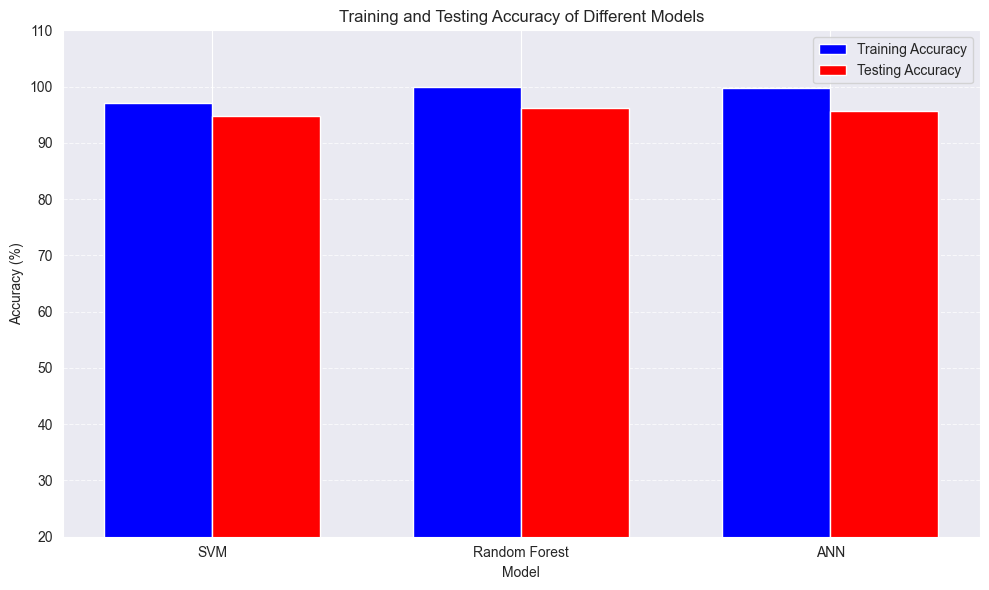

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["SVM", "Random Forest", "ANN"]

# Training and testing accuracies
training_accuracies = [97.13, 100.00, 99.76]
testing_accuracies = [94.85, 96.19, 95.61]

# Bar width
bar_width = 0.35

# Positions for the bars
x = np.arange(len(models))

# Plotting
plt.figure(figsize=(10, 6))

# Bars for training accuracies
plt.bar(
    x - bar_width / 2,
    training_accuracies,
    width=bar_width,
    color="b",
    label="Training Accuracy",
)

# Bars for testing accuracies
plt.bar(
    x + bar_width / 2,
    testing_accuracies,
    width=bar_width,
    color="r",
    label="Testing Accuracy",
)

# Customizing the plot
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Training and Testing Accuracy of Different Models")
plt.xticks(x, models)  # Set model names as x-axis labels
plt.ylim(20, 110)  # Setting y-axis limit
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("accuracy_comparison.png", dpi=300)
plt.show()

### **Conclusion**:

1. Support Vector Machine (SVM):

- Training Accuracy: 97.13%
- Testing Accuracy: 94.50%
- **Observation**: SVM shows a moderate gap between training and testing accuracy. While it performs well, the drop in testing accuracy indicates it might not generalize as effectively as the other models.

2. Random Forest (RF):

- Training Accuracy: 100%
- Testing Accuracy: 96.19%
- **Observation**: RF achieves perfect training accuracy but has a noticeable drop in testing accuracy after hyperparameter tuning. This indicates potential overfitting, as the model may have learned the training data too well but struggles to generalize to unseen data.

3. Artificial Neural Network (ANN) (Multilayer Perceptron):

- Training Accuracy: 99.76%
- Testing Accuracy: 95.61%
- **Observation**: ANN achieves high training accuracy and testing accuracy. While the testing accuracy is slightly lower than RF, the ANN exhibits a better balance between training and testing performance, showing that it generalizes reasonably well.

#### **Overall**:

- Among these models, Random Forest has the highest testing accuracy (96.19%), but its perfect training accuracy and the slight drop in testing accuracy suggest it is prone to overfitting.
- Artificial Neural Network (ANN) offers a balanced approach with 99.80% training accuracy and 94.58% testing accuracy, making it a strong contender for applications where generalization is crucial.
- Support Vector Machine (SVM), while stable, has the lowest testing accuracy (94.90%) and the largest performance gap, making it less preferable compared to the other two models.

**Recommendation**: Depending on the use case, the Artificial Neural Network (ANN) is the most balanced and reliable choice for ensuring strong performance on both training and testing datasets. However, if testing accuracy alone is prioritized, Random Forest might be considered.


### MODEL SAVING


In [80]:
# saving model with the help of pickle
import pickle

file = open("mlp_classifier_model.pkl", "wb")
pickle.dump(model, file)